## In this notebook, we will train a Neural net to classify dogs and cats. We will use the cats vs dogs dataset from Kaggle. 

We will start by downloading the dataset and unzipping it. Then we will build directories to store our different data (train, validation and test). Then we will copy the images from our unzipped directory to these directories. 
Then we will start building our model using tensorflow and Keras.

We will see how our data overfits and we will see how to tackle this overfitting problem using data augmentation first and then using pretrained neural nets.

In [1]:
import os, shutil, pathlib

# 1. Training the convnet without any regularization

## Loading the dataset and making directories

In [7]:
original_dir = pathlib.Path("C:/Users/Umar/Desktop/train")
new_base_dir = pathlib.Path("C:/Users/Umar/Desktop/cats_vs_dogs_small")

In [8]:
def make_subset(subset_name, start_index, end_index): 
     for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [9]:
make_subset("train", start_index=0, end_index=1000) 
make_subset("validation", start_index=1000, end_index=1500) 
make_subset("test", start_index=1500, end_index=2500) 

In [11]:
#checking the total no. of images
print('total training cat images:', len(os.listdir("C:/Users/Umar/Desktop/cats_vs_dogs_small/train/cat")))


total training cat images: 1000


## Building our model

In [12]:
from tensorflow.keras import layers
from tensorflow import keras

In [13]:
inputs = keras.Input(shape=(180, 180, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

## Configuring our model for training (or compiling it )

In [17]:
model.compile(loss = 'binary_crossentropy',
             optimizer = "rmsprop",
             metrics= ['accuracy'])

## Data Preprocessing

In [18]:
from tensorflow.keras.utils import image_dataset_from_directory

In [19]:
train_dataset = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)

validation_dataset = image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)

test_dataset = image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_dataset:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


## Fitting the model using a Dataset

In [22]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 118s 2s/step - loss: 0.7628 - accuracy: 0.5185 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 120s 2s/step - loss: 0.7081 - accuracy: 0.5565 - val_loss: 0.6838 - val_accuracy: 0.5470
Epoch 3/30
63/63 [==============================] - 126s 2s/step - loss: 0.6724 - accuracy: 0.5905 - val_loss: 0.6952 - val_accuracy: 0.6060
Epoch 4/30
63/63 [==============================] - 120s 2s/step - loss: 0.6514 - accuracy: 0.6640 - val_loss: 0.6512 - val_accuracy: 0.6220
Epoch 5/30
63/63 [==============================] - 122s 2s/step - loss: 0.5852 - accuracy: 0.6840 - val_loss: 0.6077 - val_accuracy: 0.6680
Epoch 6/30
63/63 [==============================] - 121s 2s/step - loss: 0.5566 - accuracy: 0.7200 - val_loss: 0.6260 - val_accuracy: 0.6560
Epoch 7/30
63/63 [==============================] - 122s 2s/step - loss: 0.5175 - accuracy: 0.7410 - val_loss: 0.5817 - val_accuracy: 0.7050
Epoch 8/30
63

## Displaying curves of loss and accuracy during training

In [23]:
import matplotlib.pyplot as plt

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

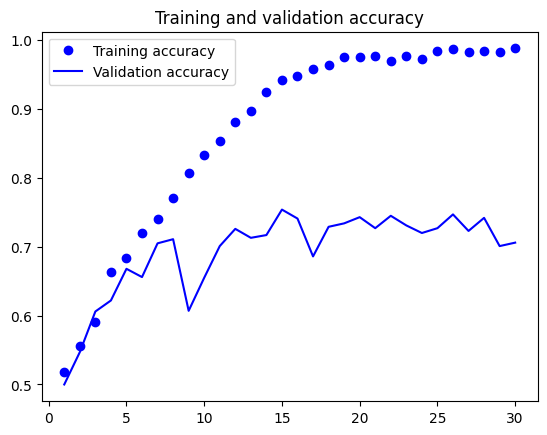

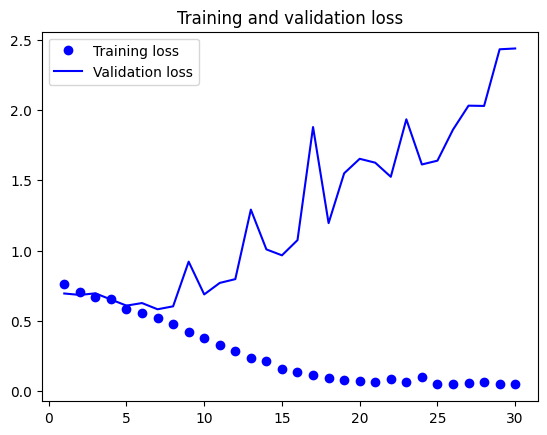

In [25]:
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We can see the effect of overfitting clearly. the training accuracy reaches to almost a 100% but the validation accuracy just reaches it maximum at 75%. 

Also we can see how the loss behaves for both training and validation. The training loss keeps decreasing linearly and the validation accuracy reaches the minimum in the first 10 epochs then varies and never reaches the same again.

## Evaluating the model on the test set

In [27]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"TEt accuracy:  {test_acc: .3f}")

63/63 [==============================] - 28s 437ms/step - loss: 0.5848 - accuracy: 0.7190
TEt accuracy:   0.719


# 2. Training the convnet using Data Augmentation
Here we will use data augmentation to redue overfiftting. We will see how data augmentation magically works.

## Define a data augmentation set of layers to add to an image model

In [28]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

## Displaying some randomly augmented training images
 

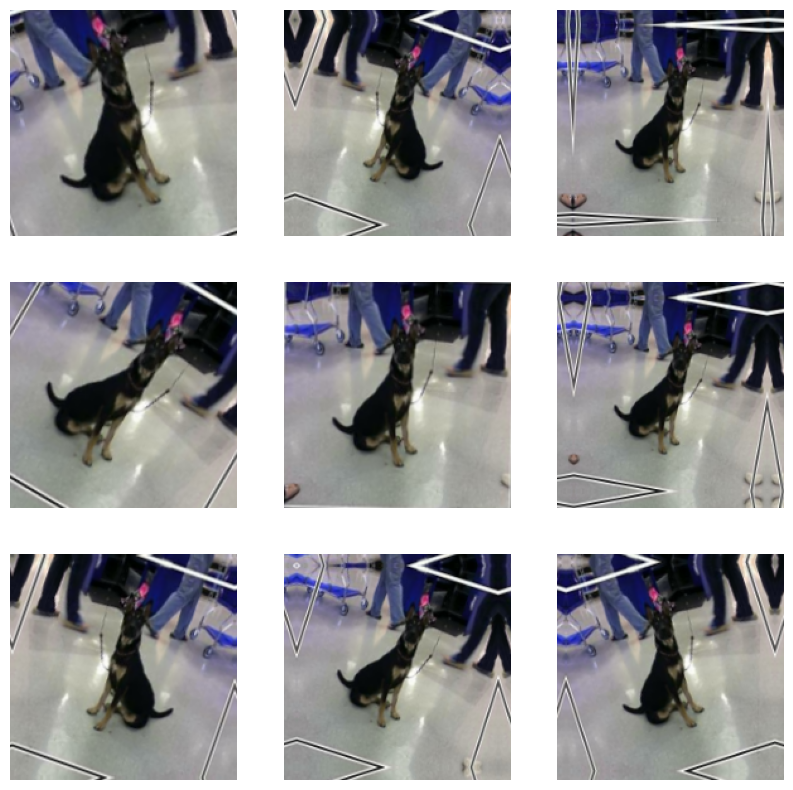

In [29]:
plt.figure(figsize=(10, 10)) 
for images, _ in train_dataset.take(1): 
     for i in range(9):
        augmented_images = data_augmentation(images) 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8")) 
        plt.axis("off")

## Defining a new convnet that includes image augmentation and dropout

In [30]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

## Training the regularized convnet

In [31]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_dataset,
 epochs=100,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 124s 2s/step - loss: 0.7353 - accuracy: 0.5180 - val_loss: 0.6904 - val_accuracy: 0.5040
Epoch 2/100
63/63 [==============================] - 129s 2s/step - loss: 0.7054 - accuracy: 0.5555 - val_loss: 0.6769 - val_accuracy: 0.5760
Epoch 3/100
63/63 [==============================] - 127s 2s/step - loss: 0.7232 - accuracy: 0.5990 - val_loss: 0.6619 - val_accuracy: 0.5510
Epoch 4/100
63/63 [==============================] - 129s 2s/step - loss: 0.6638 - accuracy: 0.6225 - val_loss: 0.7121 - val_accuracy: 0.5960
Epoch 5/100
63/63 [==============================] - 128s 2s/step - loss: 0.6452 - accuracy: 0.6445 - val_loss: 0.8857 - val_accuracy: 0.5940
Epoch 6/100
63/63 [==============================] - 126s 2s/step - loss: 0.6312 - accuracy: 0.6565 - val_loss: 0.6262 - val_accuracy: 0.6350
Epoch 7/100
63/63 [==============================] - 129s 2s/step - loss: 0.6198 - accuracy: 0.6745 - val_loss: 0.6603 - val_accuracy: 0.6140
Epoch 

63/63 [==============================] - 226s 4s/step - loss: 0.1547 - accuracy: 0.9515 - val_loss: 0.8491 - val_accuracy: 0.8220
Epoch 99/100
63/63 [==============================] - 222s 3s/step - loss: 0.1502 - accuracy: 0.9485 - val_loss: 1.1575 - val_accuracy: 0.8180
Epoch 100/100
63/63 [==============================] - 235s 4s/step - loss: 0.1369 - accuracy: 0.9575 - val_loss: 1.0522 - val_accuracy: 0.8070


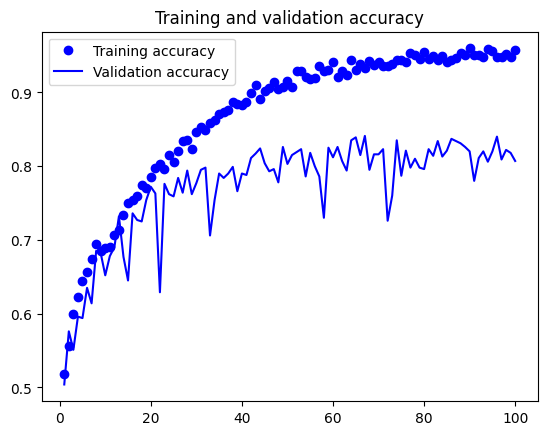

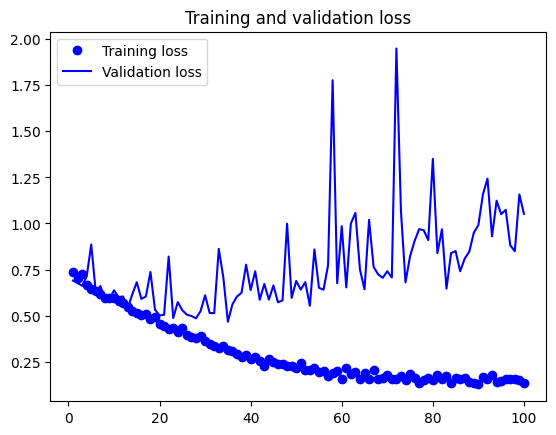

In [32]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We can see the effect of data augmentation in action. Previously, the accuracy was at most 75%, but no it is in 80 - 85% range. Pretty cool ha!

## Evaluating the model on the test set

In [33]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 29s 450ms/step - loss: 0.5211 - accuracy: 0.7830
Test accuracy: 0.783


In [35]:
model.save("convnet_from_scratch_with_augmentation.keras")

# 3. Training a convnet using a pretrained model.

Now we will use a pretrained model to further improve our model. 
We will consider a convnet trained on ImageNet Dataset and we will use VGG16 architecture.

### There are two ways  to use a pretrained model: feature extraction and fine-tuning. We’ll see both of them

# 1. Feature Extraction method

In [36]:
conv_base = keras.applications.vgg16.VGG16(weights="imagenet",
                                          include_top = False,
                                          input_shape=(180,180,3))

58889256/58889256 [==============================] - 15s 0us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

After this we have two ways to proceed:
1. Fast feature extraction without data augmentation
2. Feature extraction with data augmentation

We'll look at both

### 1. Fast feature extraction without data augmentation
We’ll start by extracting features as NumPy arrays by calling the predict() method of
the conv_base model on our training, validation, and testing datasets.

#### Extracting the VGG16 features and corresponding labels

In [38]:
import numpy as np

In [40]:
def get_features_and_labels(dataset):
    all_features  = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
        
    return np.concatenate(all_features), np.concatenate(all_labels)

In [41]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 5s 5s/step


#### Define and train a densely connected layer

In [42]:
inputs = keras.Input(shape=(5,5,512))
x = layers.Flatten() (inputs)
x = layers.Dense(256) (x)
x = layerssDropoutDropout(0.5) (x)
outputs = layers.Dense(1, activation = 'sigmoid') (x)
model = keras.Model(inputs, outputs)

In [43]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_features, train_labels,
 epochs=20,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 53ms/step - loss: 17.3336 - accuracy: 0.9245 - val_loss: 4.5154 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 3s 48ms/step - loss: 3.2346 - accuracy: 0.9770 - val_loss: 7.7494 - val_accuracy: 0.9640
Epoch 3/20
63/63 [==============================] - 3s 47ms/step - loss: 2.3107 - accuracy: 0.9870 - val_loss: 3.3642 - val_accuracy: 0.9780
Epoch 4/20
63/63 [==============================] - 3s 47ms/step - loss: 1.4855 - accuracy: 0.9900 - val_loss: 2.8533 - val_accuracy: 0.9760
Epoch 5/20
63/63 [==============================] - 3s 49ms/step - loss: 1.1718 - accuracy: 0.9915 - val_loss: 3.8811 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 3s 50ms/step - loss: 0.8445 - accuracy: 0.9935 - val_loss: 9.3599 - val_accuracy: 0.9630
Epoch 7/20
63/63 [==============================] - 4s 56ms/step - loss: 0.5104 - accuracy: 0.9950 - val_loss: 14.6503 - val_accuracy: 0.9530
Epoch 8/20


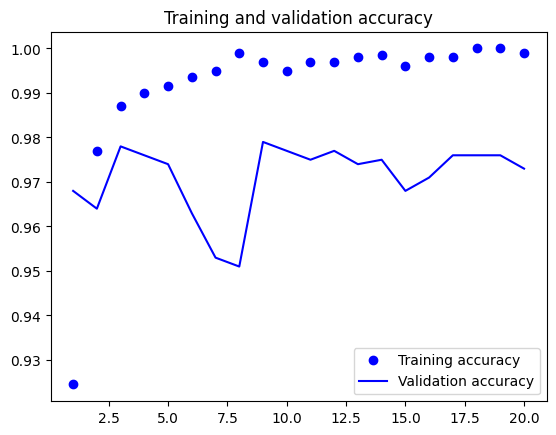

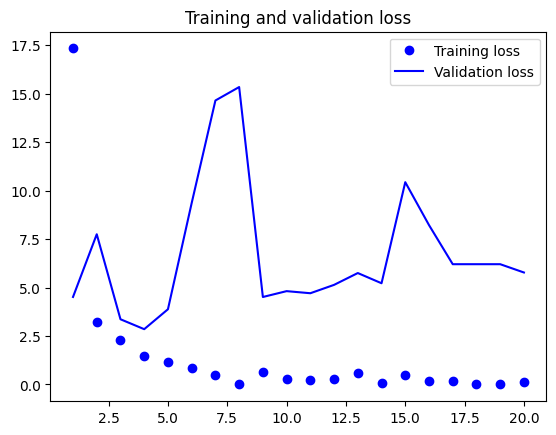

In [44]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### 2. Feature extraction with data augmentation

This technique will allow us to use data augmentation during training

#### Instantiating and freezing the VGG16 convolutional base

We will first freeze the convolutional base. Freezing a layer or set of
layers means preventing their weights from being updated during training

In [45]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False)

#following line freezes the convolution base
conv_base.trainable = False

In [47]:
#checking the list of trainable weights before and after freezing
conv_base.trainable = True
print("This is the number of trainable weights "
 "before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights "
 "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


 Now we can train a model that will chain together:
1. A data augmentation stage
2. Our frozen convolutional base
3. A dense classifier

#### Adding a data augmentation stage and a classifier to the convolutional base

In [48]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

In [49]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) 
x = keras.applications.vgg16.preprocess_input(x) 
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction_with_data_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset,
 callbacks=callbacks)

#### Training the above model would take very much time if not trained on GPU because this technique is very expensive.

#### Anyway, after training that model with a GPU ( the free GPU available in Colab) we will get an validation accuracy of 98% and a test accuracy of 97.5%.

#### Pretty neat!

# 2. Fine-tuning method
Fine-tuning consists of unfreezing
a few of the top layers of a frozen model base used
for feature extraction, and jointly training both the
newly added part of the model (in this case, the
fully connected classifier) and these top layers.

Here are the setps to achieve this: 
1. Add our custom network on top of an already-trained base network.
2. Freeze the base network.
3. Train the part we added.
4. Unfreeze some layers in the base network.
5. Jointly train both these layers and the part we added.

In [51]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
 metrics=["accuracy"])

callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="fine_tuning.keras",
 save_best_only=True,
 monitor="val_loss")
]

history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

#### Again, training this model should be made only if GPU is available. Well, after training this mode on free GPU and testing it on test data, we get a test accuracy of 98.5%.


### We saw how can we train a deep NN that classifies dogs and cats. We started from scratch and increasingly used different techiques to get a good percntage of acacuracy and loss. 

### We saw how we can use techniques like data augmentation and pretrained model to further increase accuracy.  

### One last thing, we will now see what actually the layers in the model learn. We will visualize and interpret what convnets lern.

# Visualizing and Interpreting what convnets learn

The representations learned by convnets are highly amenable to visualization, in large part because they’re representations of visual concepts.

Although many visualization techniques have been developed, we will see the one which will help us with ou problem of cats and dogs

### Visualizing intermediate activations


In [53]:
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [55]:
#processing a single image 
img_path = keras.utils.get_file(fname = 'cat.jpg',origin="https://img-datasets.s3.amazonaws.com/cat.jpg")

80329/80329 [==============================] - 1s 6us/step


In [56]:
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size) 
    array = keras.utils.img_to_array(img) 
    array = np.expand_dims(array, axis=0) 
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

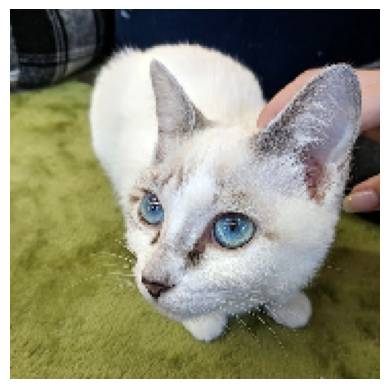

In [57]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [58]:
layer_outputs = []
layer_names = [] 
for layer in model.layers: 
     if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)): 
        layer_outputs.append(layer.output) 
        layer_names.append(layer.name) 
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [59]:
activations = activation_model.predict(img_tensor) 

1/1 [==============================] - 0s 293ms/step


In [60]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 178, 178, 32)


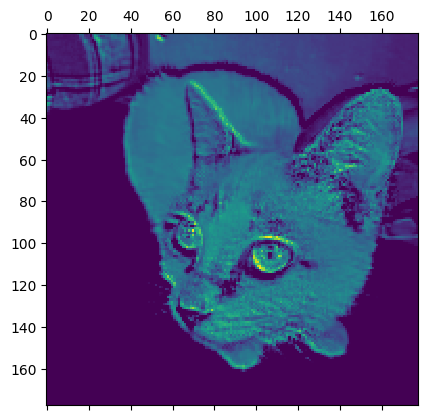

In [61]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap="viridis")

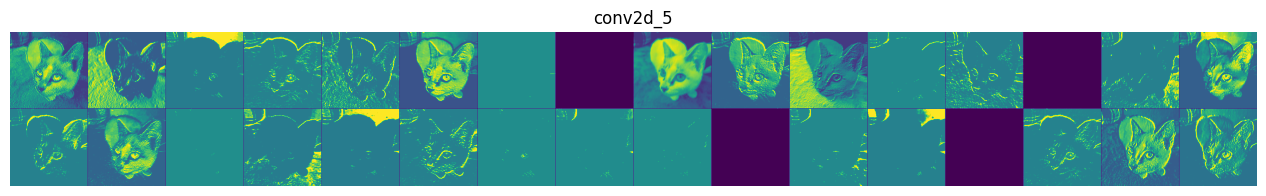

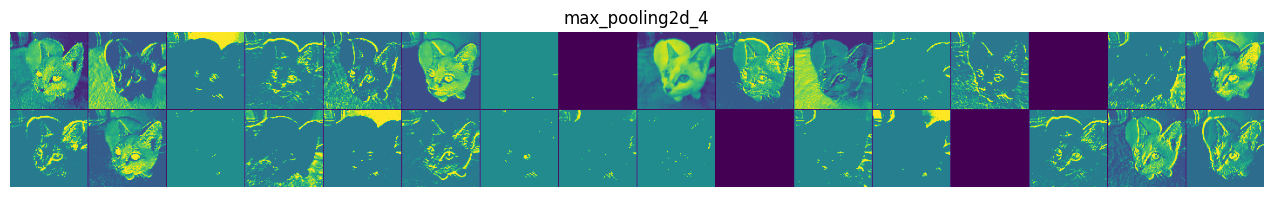

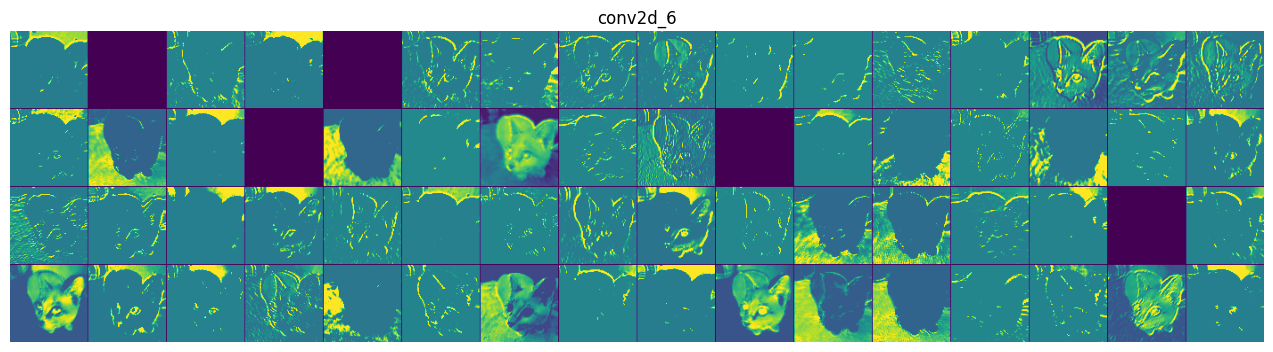

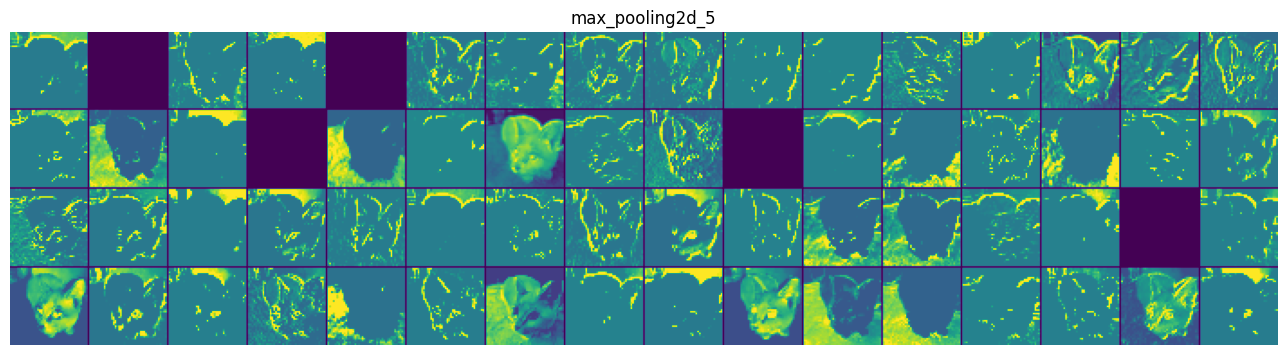

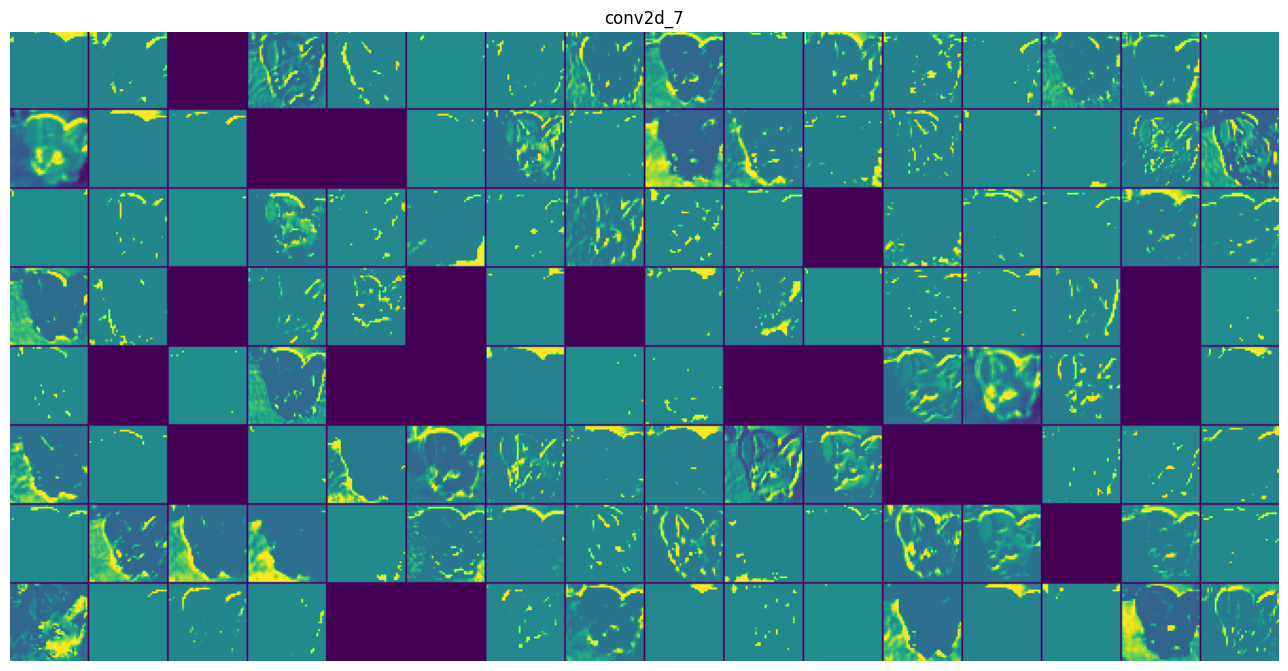

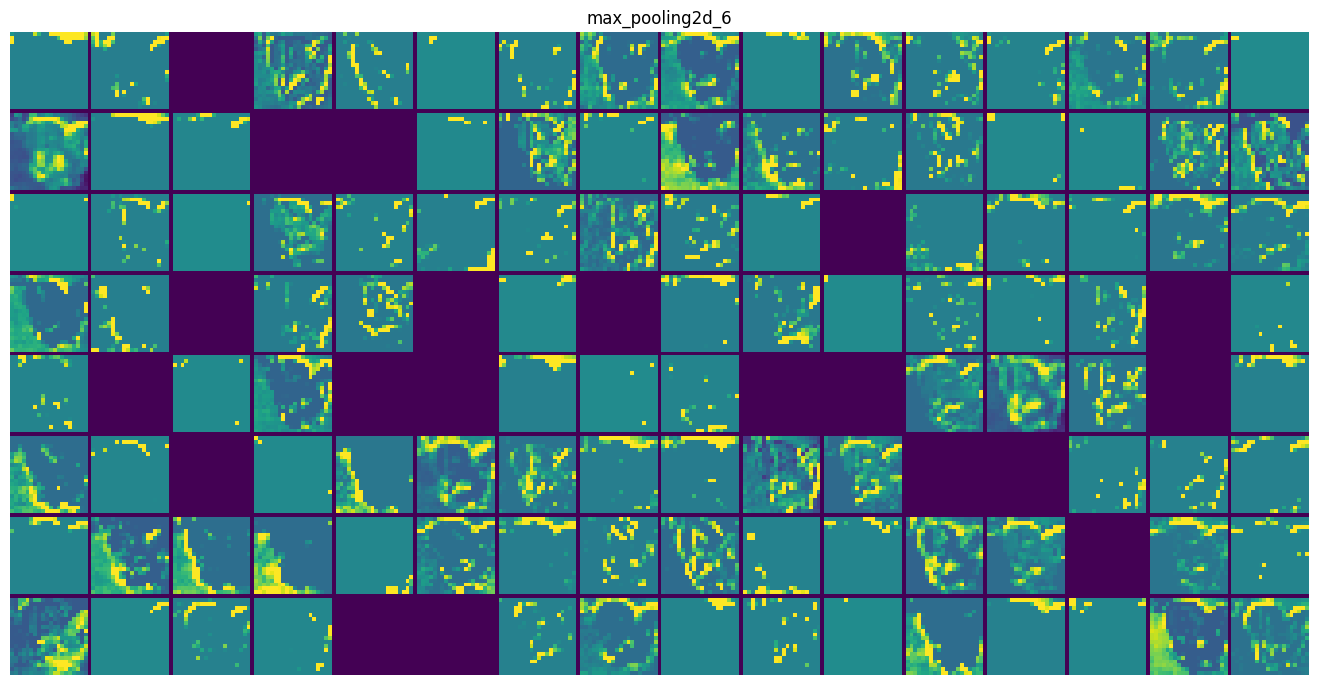

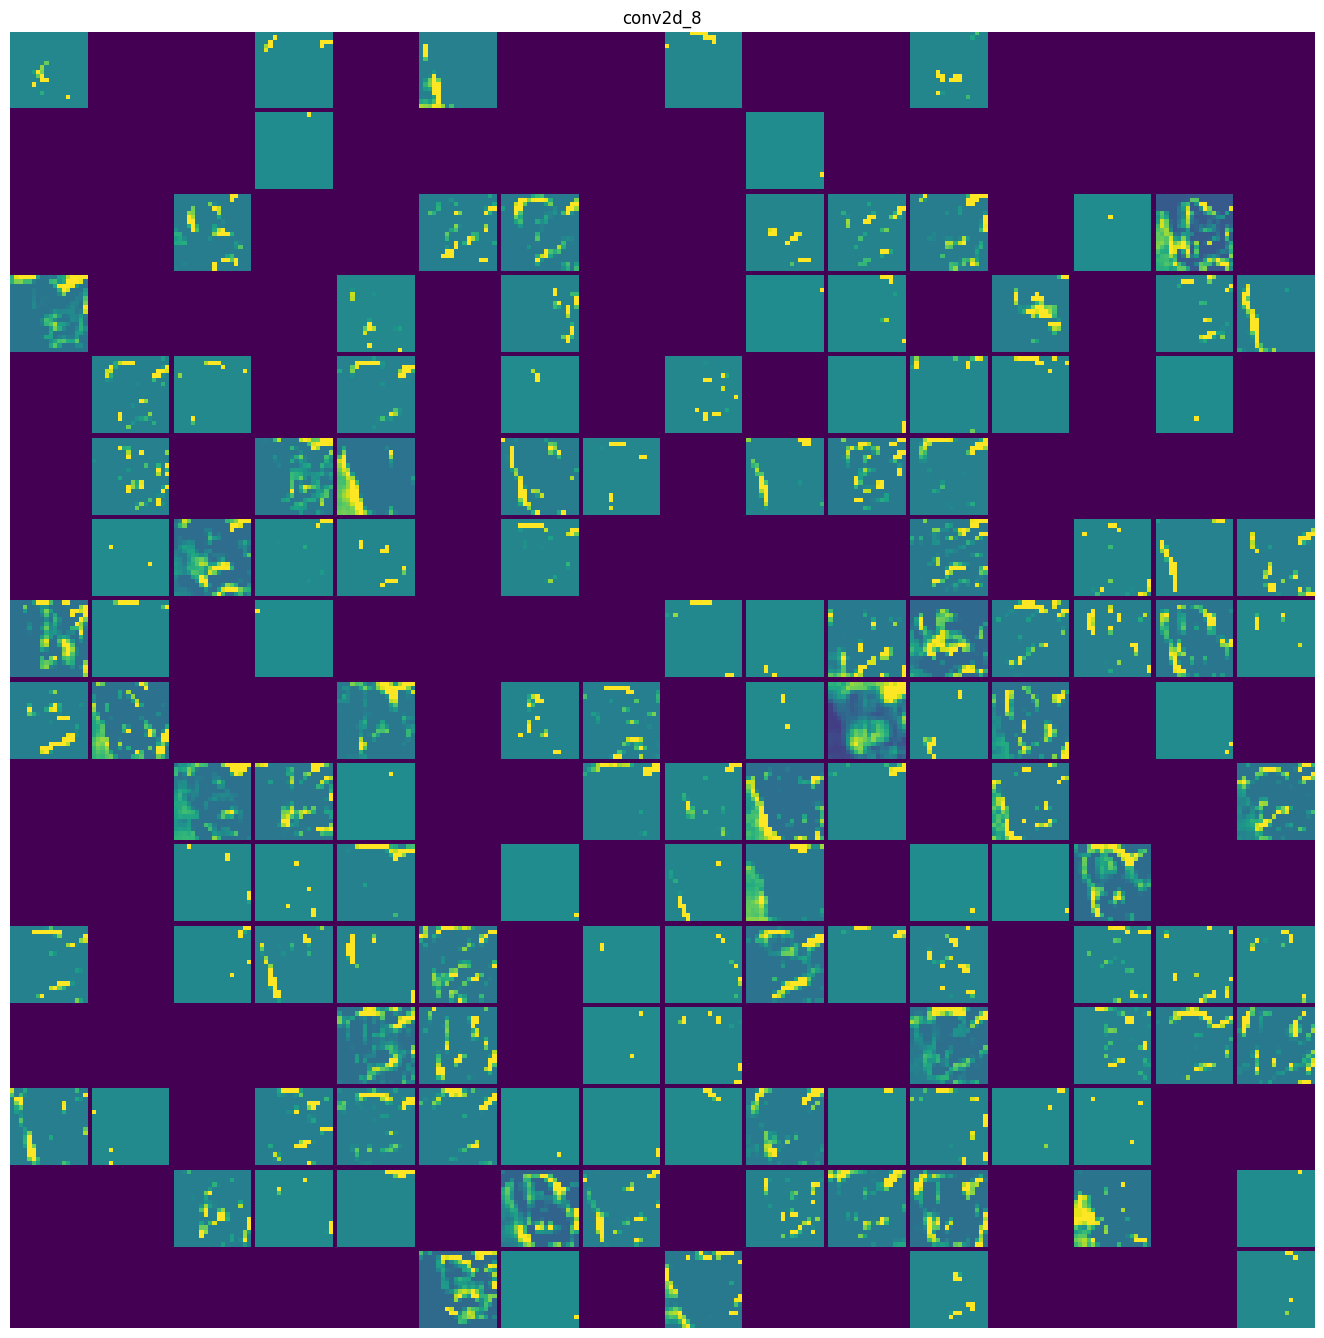

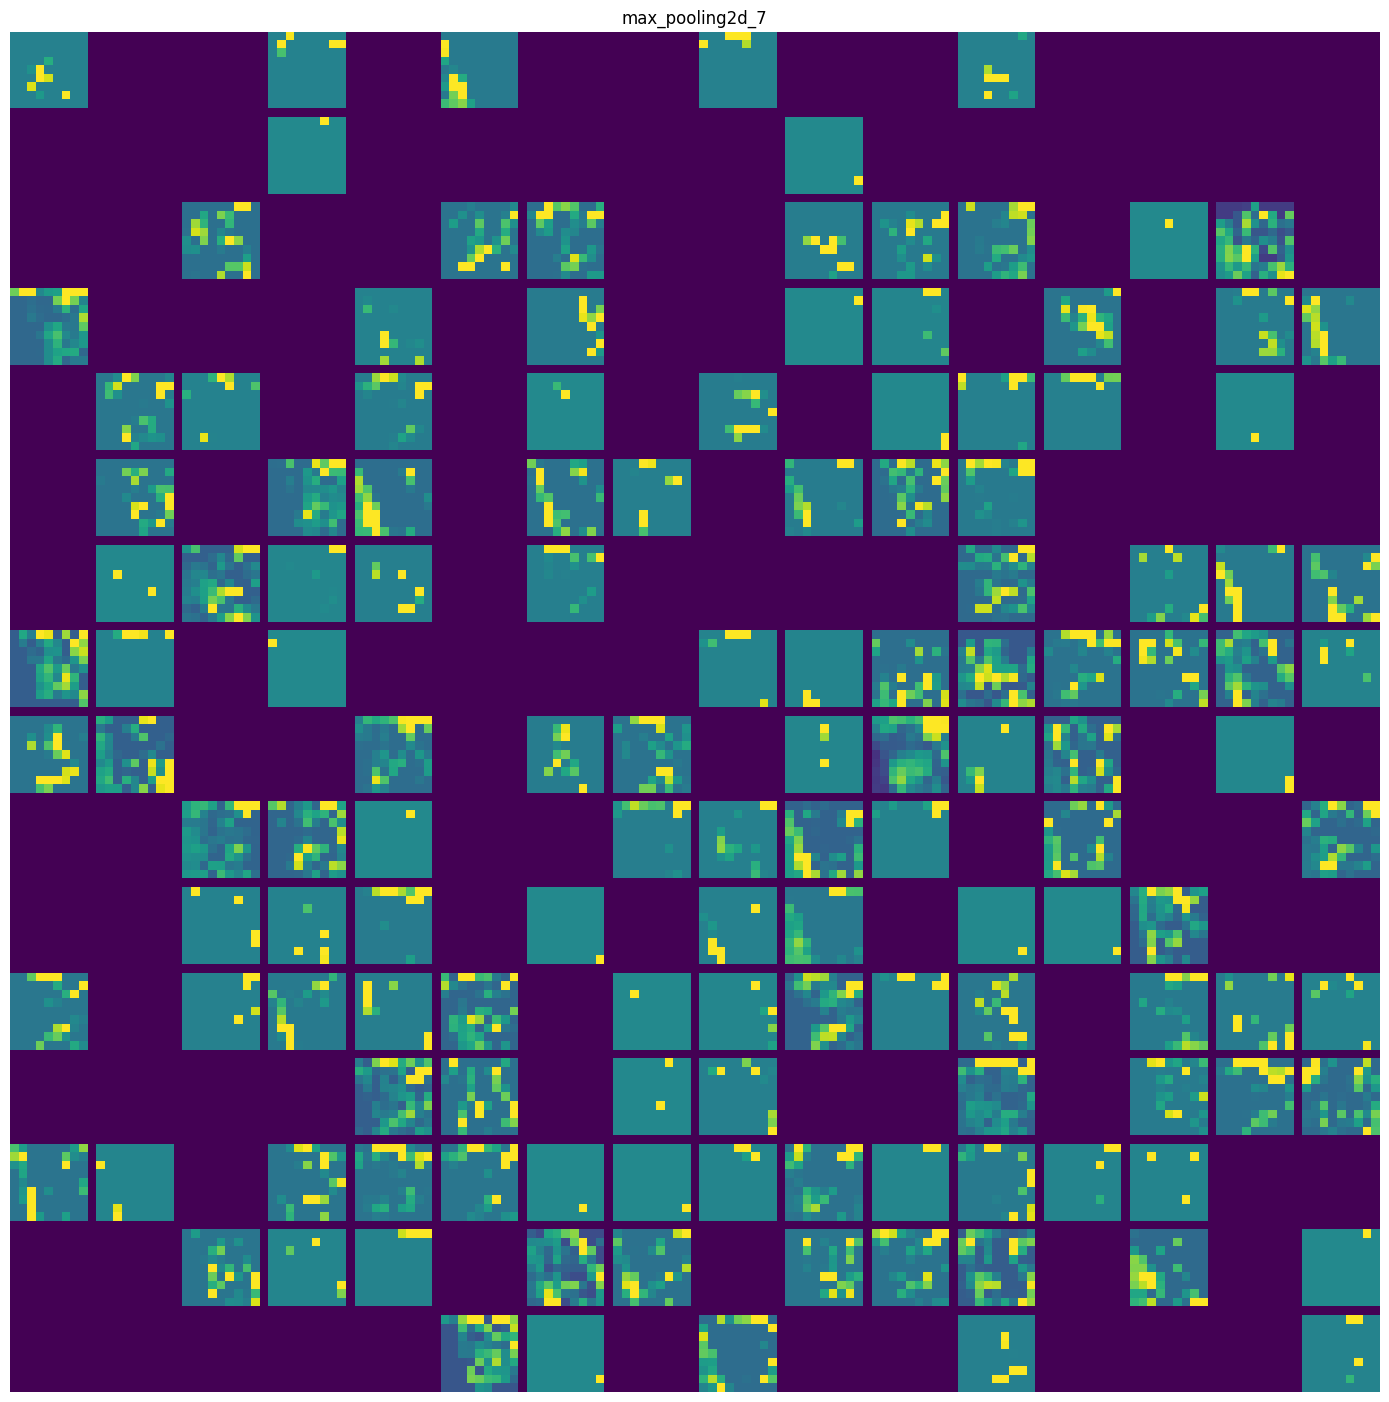

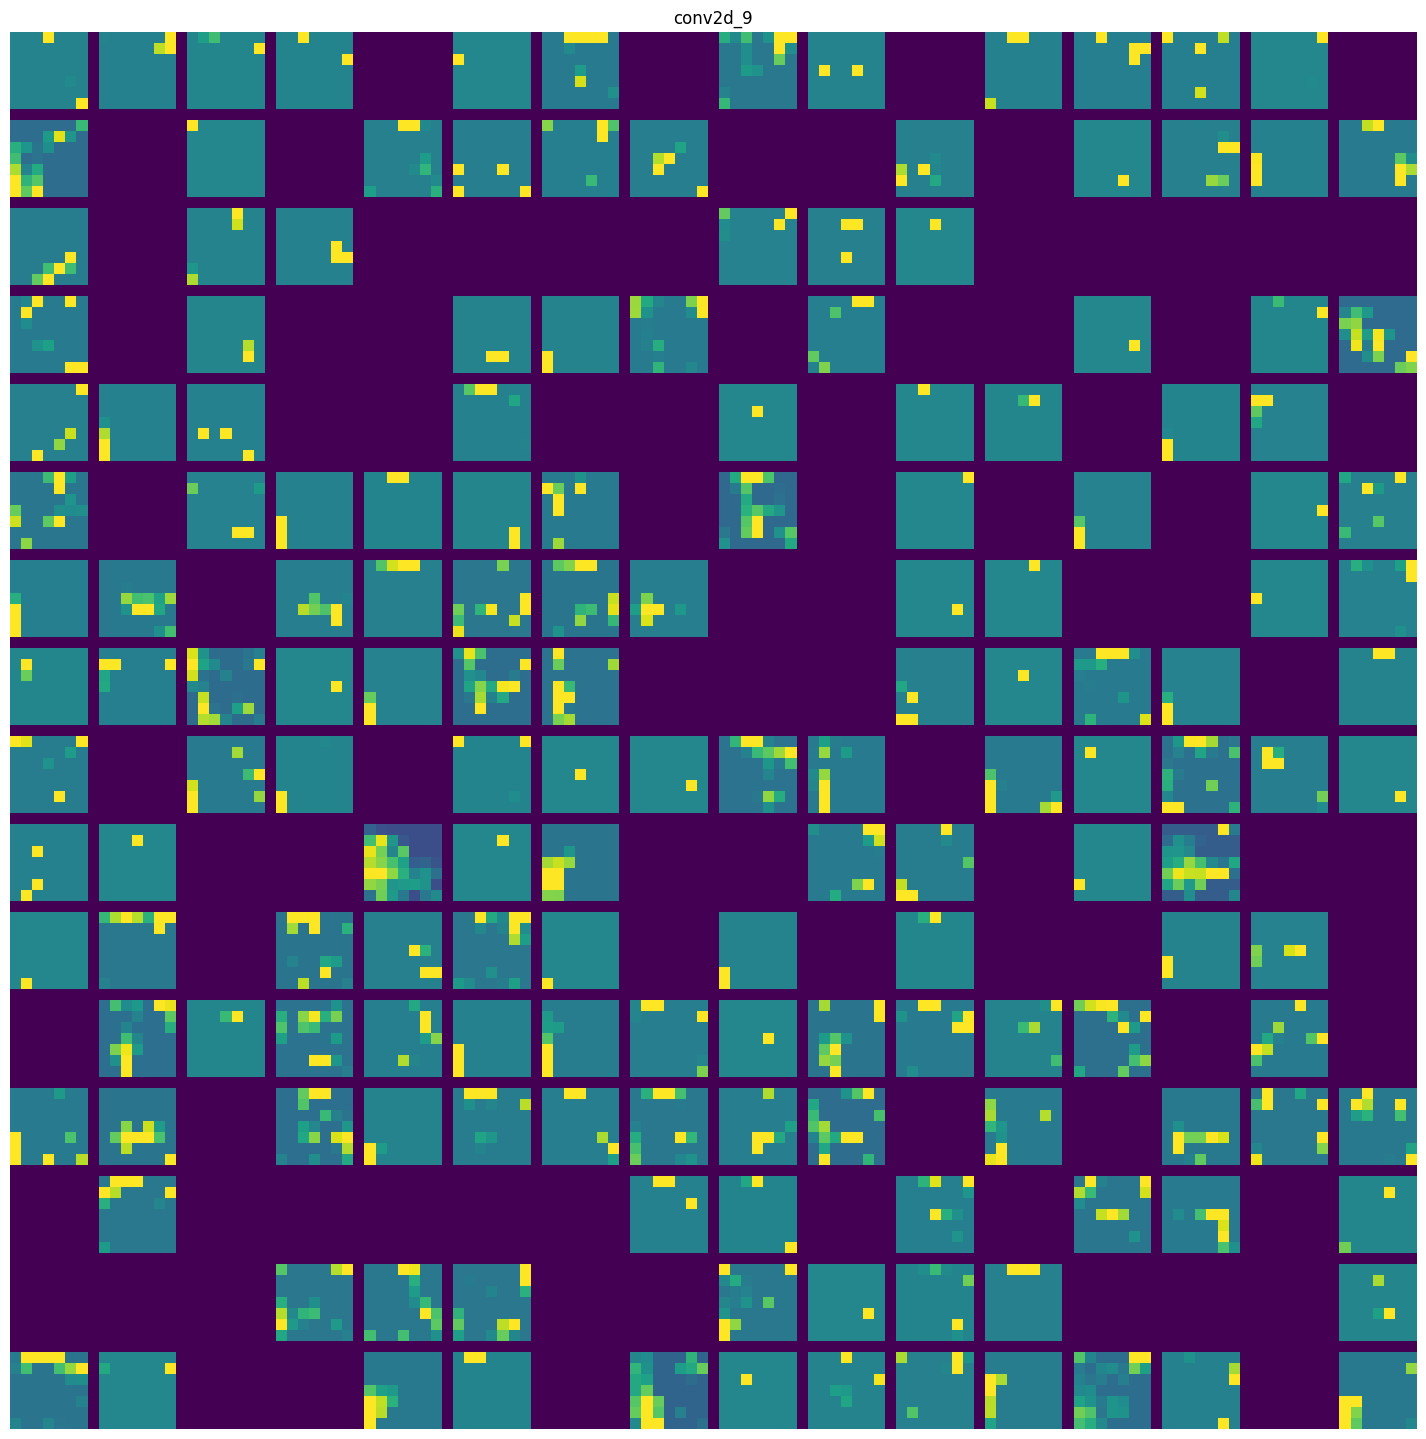

In [70]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0: 
                channel_image -= channel_image.mean() 
                channel_image /= channel_image.std() 
                channel_image *= 64 
                channel_image += 128 
            channel_image = np.clip(channel_image, 0, 255).astype("uint8") 
            display_grid[col * (size + 1): (col + 1) * size + col, 
                     row * (size + 1) : (row + 1) * size + row] = channel_image 
    scale = 1. / size 
    plt.figure(figsize=(scale * display_grid.shape[1], 
                    scale * display_grid.shape[0])) 
    plt.title(layer_name) 
    plt.grid(False) 
    plt.axis("off") 
    plt.imshow(display_grid, aspect="auto", cmap="viridis")
    plt.show()

These plots reveal a very interesting fact: the features extracted by a layer become increasingly abstract with the depth of the layer. The activations of higher layers carry less and less information about the specific input being seen, and more and more information about the target (in this case, the class of the image: cat or dog). We can think of a deep neural net as an information distillation pipeline, with raw data going in (in this case, RGB pictures) and being repeatedly transformed so that irrelevant information is filtered out (for example, the specific visual appearance of the image), and useful information is magnified and refined (for example, the class of the image).